In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import math
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder

In [147]:
pd.set_option('display.max_columns', None)

In [148]:
df = pd.read_csv("/content/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [149]:
df.shape

(51717, 17)

In [150]:
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [151]:
df.drop(['url'], axis = 1 , inplace = True)
df.drop(['address'], axis = 1 , inplace = True)
df.drop(['phone'], axis = 1 , inplace = True)
df.drop(['dish_liked'], axis = 1 , inplace = True)
df.drop(['reviews_list'], axis = 1 , inplace = True)
df.drop(['menu_item'], axis = 1 , inplace = True)

In [152]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [153]:
df.duplicated().sum()

108

In [154]:
df.drop_duplicates(inplace=True)

In [155]:
df.shape

(51609, 11)

In [156]:
df['location'].nunique()

93

In [157]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [158]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')

In [159]:
df['rate'] = df['rate'].str.split('/', expand=True)[0]

In [160]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')


In [161]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari


In [162]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [163]:
df['online_order'] = df['online_order'].replace({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].replace({'Yes': 1, 'No': 0})

In [164]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,10019
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),344
listed_in(type),0


In [165]:
#df['cuisines'] = df['cuisines'].apply(lambda x: x.replace(',', ''))
#df['location'] = df['location'].apply(lambda x: x.replace(',', ''))

In [166]:
# replacing null in continuous column with mean
df['rate'].fillna(df['rate'].mean(), inplace=True)
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)

In [167]:
import statistics

c = [2, 4, 3, 2, 5, 10, 9, 6, 1, 100]
mean = statistics.mean(c)
median= statistics.median(c)
print(mean , median)

14.2 4.5


In [168]:
# replacing null in Catg column with mode
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)
df['cuisines'].fillna(df['cuisines'].mode()[0], inplace=True)

In [169]:
df.reset_index(drop=True)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,0,0,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51604,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51605,Vinod Bar And Restaurant,0,0,3.700142,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51606,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700142,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51607,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


In [170]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [171]:
laen = LabelEncoder()
df['name'] = laen.fit_transform(df['name'])
df['location'] = laen.fit_transform(df['location'])
df['rest_type'] = laen.fit_transform(df['rest_type'])
df['cuisines'] = laen.fit_transform(df['cuisines'])
df['listed_in(city)'] = laen.fit_transform(df['listed_in(city)'])
df['listed_in(type)'] = laen.fit_transform(df['listed_in(type)'])

In [172]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,3690,1,1,4.1,775,1,27,2159,800.0,0,1
1,7022,1,0,4.1,787,1,27,952,800.0,0,1
2,6499,1,0,3.8,918,1,22,766,800.0,0,1
3,199,0,0,3.7,88,1,78,2555,300.0,0,1
4,2940,0,0,3.8,166,4,27,2188,600.0,0,1


In [173]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  int64  
 1   online_order                 51609 non-null  int64  
 2   book_table                   51609 non-null  int64  
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51609 non-null  int64  
 6   rest_type                    51609 non-null  int64  
 7   cuisines                     51609 non-null  int64  
 8   approx_cost(for two people)  51609 non-null  float64
 9   listed_in(type)              51609 non-null  int64  
 10  listed_in(city)              51609 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 4.7 MB


In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
name,51609.0,4330.499235,2555.032311,0.0,2055.0,4293.000000,6556.0,8791.0
online_order,51609.0,0.588289,0.492148,0.0,0.0,1.000000,1.0,1.0
book_table,51609.0,0.124319,0.329949,0.0,0.0,0.000000,0.0,1.0
rate,51609.0,3.700142,0.395393,1.8,3.5,3.700142,3.9,4.9
votes,51609.0,283.283361,803.282771,0.0,7.0,41.000000,198.0,16832.0
location,51609.0,36.042764,27.185412,0.0,12.0,32.000000,55.0,92.0
rest_type,51609.0,51.364026,27.585883,0.0,27.0,46.000000,78.0,92.0
cuisines,51609.0,1402.583387,772.451317,0.0,698.0,1473.000000,1978.0,2722.0
approx_cost(for two people),51609.0,555.170682,437.123484,40.0,300.0,400.000000,650.0,6000.0
listed_in(type),51609.0,2.807689,1.140684,0.0,2.0,2.000000,4.0,6.0


In [176]:
df.corr()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
name,1.000000,0.010980,0.011609,0.010772,0.005264,0.016954,0.009271,0.089342,0.031722,0.015903,-0.001105
online_order,0.010980,1.000000,0.001019,0.059870,0.034981,-0.058198,-0.025669,-0.026810,-0.082486,-0.225985,-0.053853
book_table,0.011609,0.001019,1.000000,0.412983,0.404887,0.079051,-0.240432,-0.017602,0.617240,0.104248,0.022788
rate,0.010772,0.059870,0.412983,1.000000,0.426892,0.078505,-0.199764,-0.078187,0.364141,0.030969,0.016354
votes,0.005264,0.034981,0.404887,0.426892,1.000000,0.043308,-0.153972,-0.045895,0.380218,0.062759,0.022157
location,0.016954,-0.058198,0.079051,0.078505,0.043308,1.000000,-0.050232,0.001392,0.146932,0.043254,0.313735
rest_type,0.009271,-0.025669,-0.240432,-0.199764,-0.153972,-0.050232,1.000000,0.288055,-0.348795,0.046957,0.000881
cuisines,0.089342,-0.026810,-0.017602,-0.078187,-0.045895,0.001392,0.288055,1.000000,-0.063287,0.066132,-0.006331
approx_cost(for two people),0.031722,-0.082486,0.617240,0.364141,0.380218,0.146932,-0.348795,-0.063287,1.000000,0.166752,0.050069
listed_in(type),0.015903,-0.225985,0.104248,0.030969,0.062759,0.043254,0.046957,0.066132,0.166752,1.000000,0.029467


<Axes: >

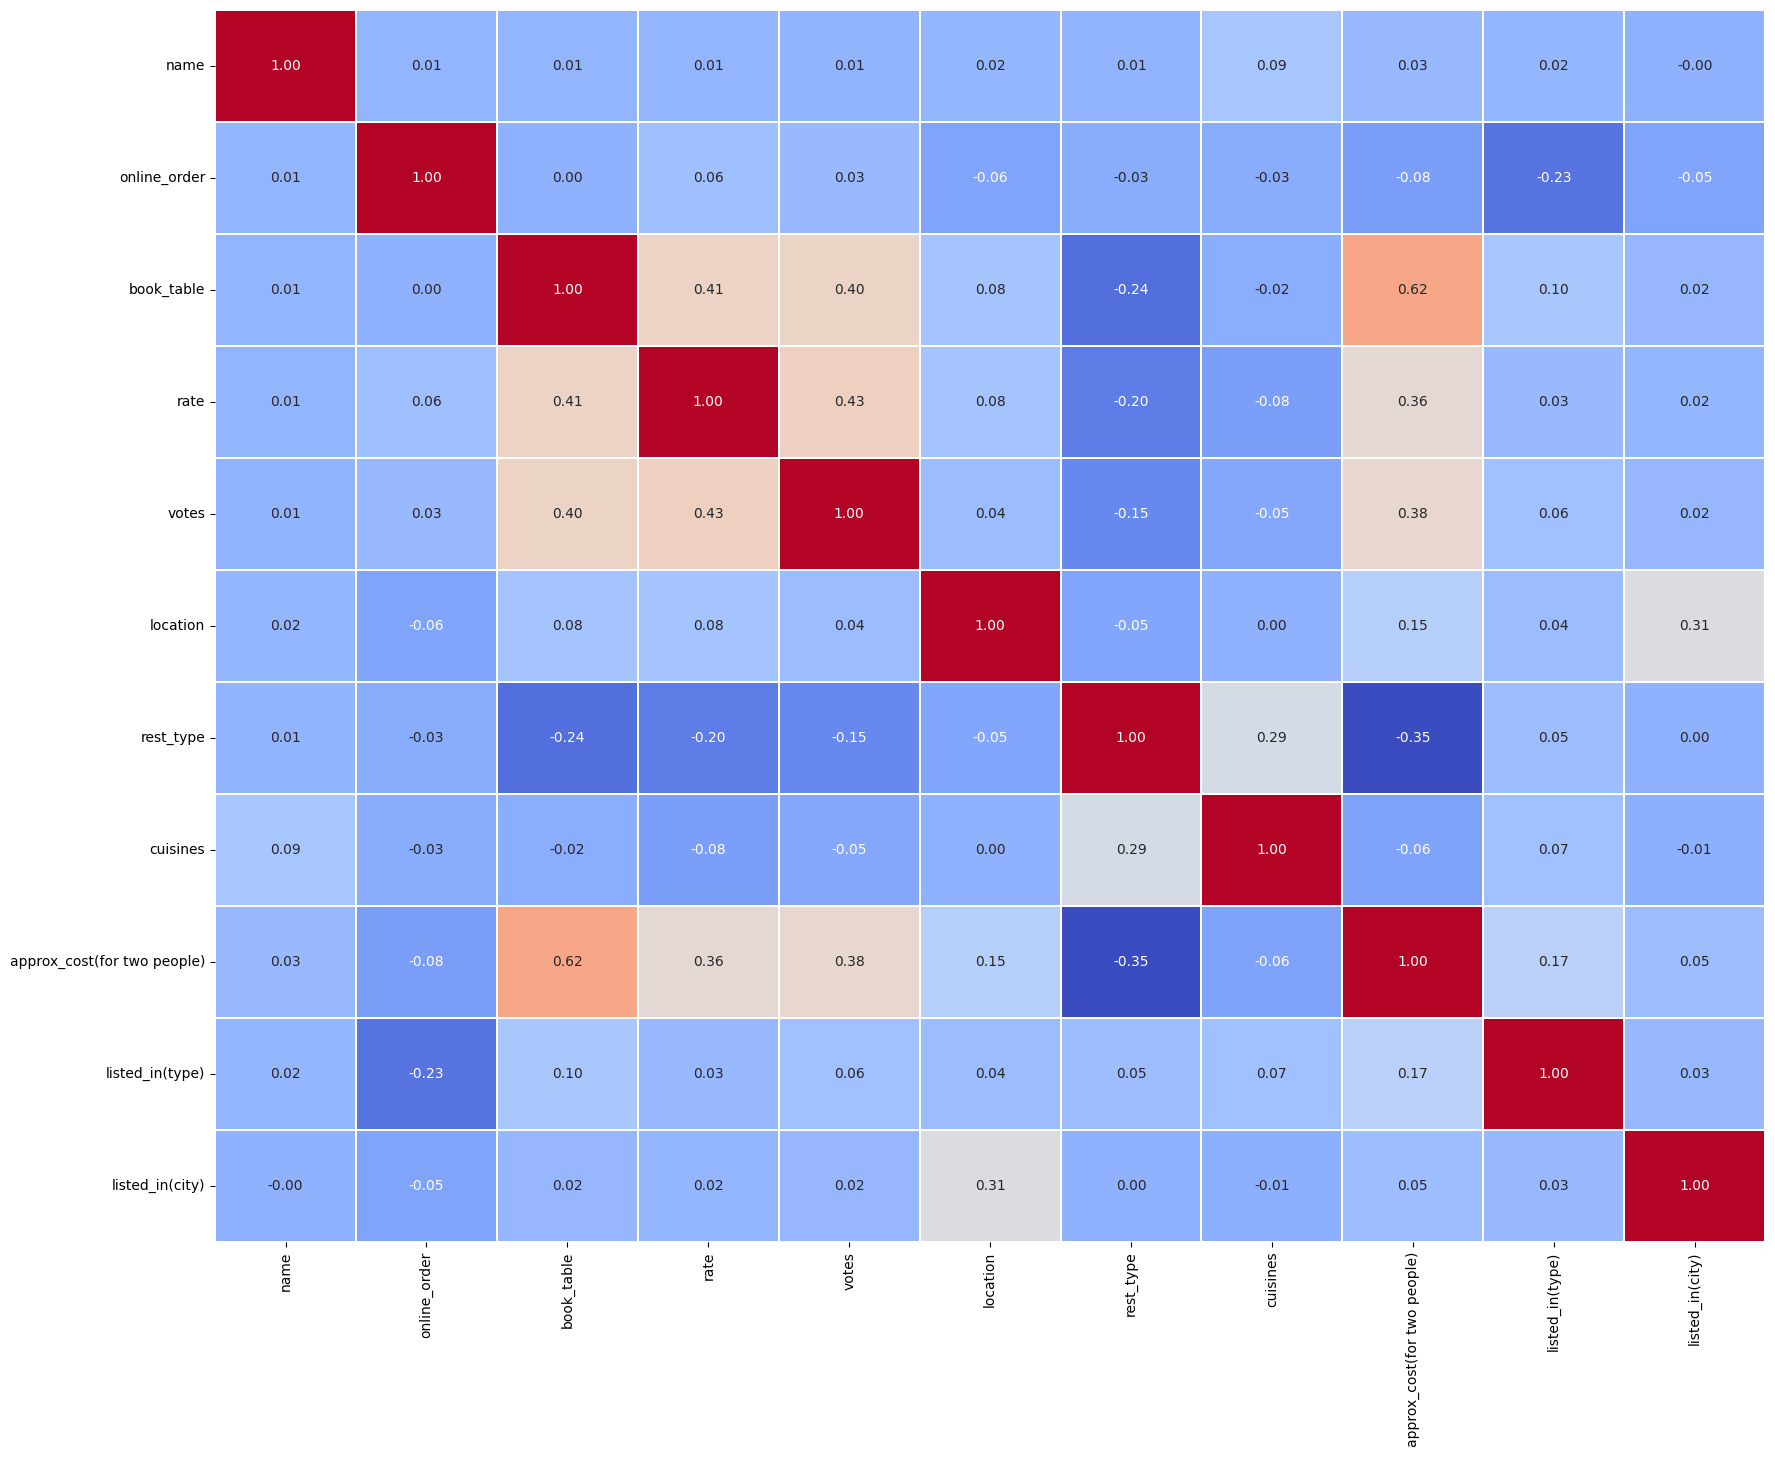

In [177]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(df.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [178]:
cont = ['rate', 'votes', 'approx_cost(for two people)']

In [179]:
for i in ['rate', 'votes', 'approx_cost(for two people)']:
  print(f'skewness of {i} = {skew(df[i])}')

skewness of rate = -0.36647979651884066
skewness of votes = 7.564913882891269
skewness of approx_cost(for two people) = 2.615164234755507


In [180]:
def chart(column):
  plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  sns.histplot(data= df,x=column,kde=True,bins=30,color='red')

  plt.subplot(1,2,2)
  sns.boxplot(df[column])
  plt.show

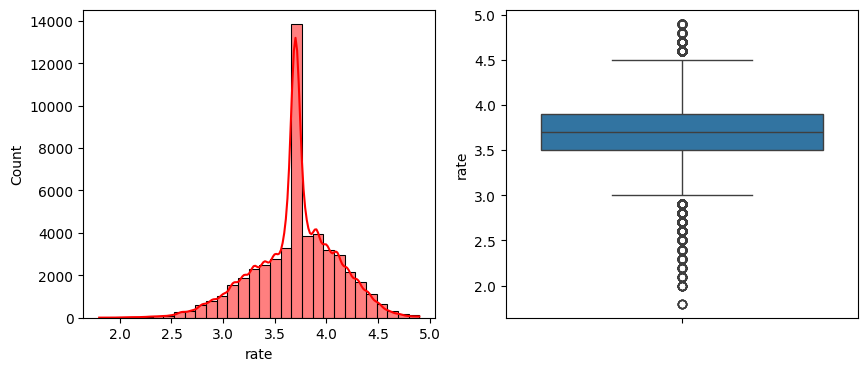

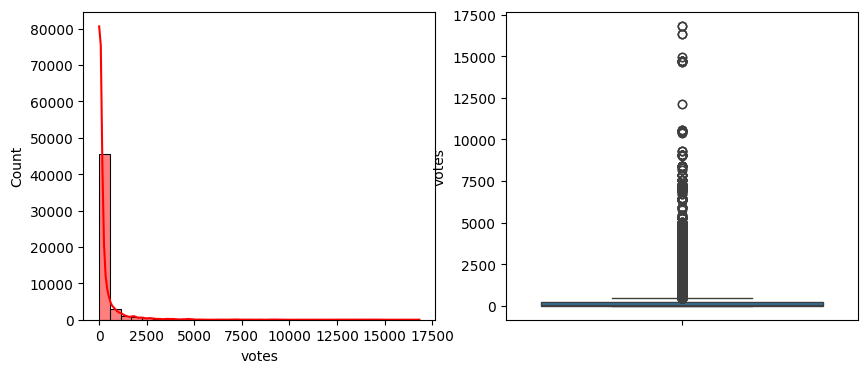

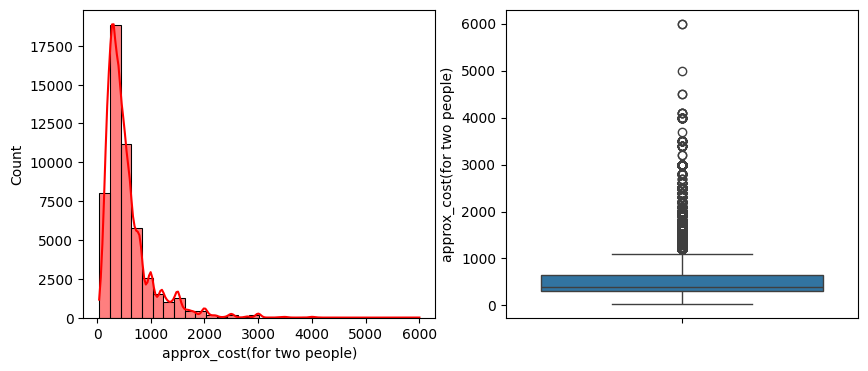

In [181]:
for i in cont:
  chart(i)

In [182]:
df.shape

(51609, 11)

In [183]:
# function to remove outliers using the IQR method
def outliers(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df=df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df


In [184]:
for i in cont:
  outliers(df,i)

In [185]:
df.shape

(51609, 11)

In [186]:
df.rename(columns={'approx_cost(for two people)': 'approx_cost'}, inplace=True)
df.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)
df.rename(columns={'listed_in(city)': 'listed_city'}, inplace=True)

In [187]:
#Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [188]:
x=df.drop('rate', axis=1)
y = df['rate']

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [190]:
res=[]
def model_check(name, model):
  model= model.fit(x_train, y_train)
  y_predict= model.predict(x_test)

  data ={'Model_Name': name,
         'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
         'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
         'R2_Score': round(r2_score(y_test, y_predict), 4)}

  res.append(data)

In [191]:
model_check('DecisionTreeRegressor', DecisionTreeRegressor())
model_check('LinearRegression', LinearRegression())
model_check('RandomForestRegressor', RandomForestRegressor())
model_check('ExtraTreesRegressor', ExtraTreesRegressor())
model_check('GradientBoostingRegressor', GradientBoostingRegressor())
model_check('AdaBoost Regressor', AdaBoostRegressor())

In [192]:
reg_model = pd.DataFrame(res)
reg_model

,Model_Name,Mean_Absolute_Error,Mean_Square_Error,R2_Score
0,DecisionTreeRegressor,0.0300,0.0163,0.8959
1,LinearRegression,0.2521,0.1137,0.2722
2,RandomForestRegressor,0.0443,0.0107,0.9316
3,ExtraTreesRegressor,0.0336,0.0090,0.9427
4,GradientBoostingRegressor,0.1783,0.0742,0.5251
5,AdaBoost Regressor,0.2991,0.1275,0.1836


In [193]:
# As ExtraTrees have good R2 score and less MAE, MSE
#hypertune the model
model= ExtraTreesRegressor().fit(x_train, y_train)
y_predict= model.predict(x_test)

data ={'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
        'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
        'R2_Score': round(r2_score(y_test, y_predict), 4)}

data

{'Mean_Absolute_Error': 0.033, 'Mean_Square_Error': 0.009, 'R2_Score': 0.9427}

In [194]:
import pickle

In [195]:
pickle.dump(model, open('ZomatoRegg_model', 'wb'))

In [196]:
path='/content/ZomatoRegg_model'

In [197]:
model1=pickle.load(open(path, 'rb'))

In [198]:
x_train.head(1)

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost,listed_type,listed_city
8703,3644,1,0,28,32,6,287,200.0,2,0


In [199]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,listed_type,listed_city
0,3690,1,1,4.1,775,1,27,2159,800.0,0,1


In [200]:
tes=[3644, 1,	0,	28,	32,	6,	287,	200.0,	2,	0]

In [201]:
te=pd.DataFrame([tes])

In [202]:
model1.predict(te)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([3.7])